# PIV Lab Visualisation of the preperation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import PIV_functions as piv_f

## Initialisation


In [2]:
# Camera Specs
Npix_horizontal: int = 1628
Npix_vertical: int = 1236
Camera_aspect_ratio = Npix_horizontal / Npix_vertical  # horizontal / vertical
Pixel_pitch = 4.40                              # [micro m]

Max_recording_rate = 8.3                        # [Hz]
Min_separation_time = 1 / Max_recording_rate    # [s]

Camera_focal_length = 35.                       # [mm]
fStop_min, fStop_max = 2.8, 32

chord_length = 10                               # [cm]

# Object specs
Chord_length = 0.1                              # [m]
FOV_to_chord = 1.5                              # [-]

# Laser specs
Wavelength = 532e-3  # in [micro m]

# Tracing particle specs
Particle_mean_diameter = 1.068  # in [micro m]

# Selected fStop
fStop = 9.7
D_tau_init = 3             # [pixels]

Window_size  =   [64,32,16]  # [pixels]
Velocity     =   10          # [m/s]

D_p = 1*10**-6               # [m]


## Calculations

### Questions 1-3; FOV, magnification and distances

In [3]:
FOV_length = FOV_to_chord * Chord_length        # [m]
FOV_height = FOV_length / Camera_aspect_ratio   # [m]

Magnification_factor = Npix_horizontal * Pixel_pitch * 1e-6 / FOV_length
Object_distance = Camera_focal_length * (1 + 1 / Magnification_factor)  # in [mm]
Image_distance = Camera_focal_length * (1 + Magnification_factor)  # in [mm]

### Questions 4 and 5; aperture and delta_t

In [7]:
# from fStop to D_tau
D_diff = 2.44 * Wavelength*10**-6 * fStop * (Magnification_factor+1)   # [m]
D_geo  = Magnification_factor*D_p
D_tau   = np.sqrt((D_geo)**2 + D_diff**2)           # [m]
D_tau_pixels = D_tau / (Pixel_pitch*10**-6)                            # [pixels]

# from D_tau to fStop
D_tau_init_in_m = D_tau_init * Pixel_pitch
D_diff_2 = np.sqrt(D_tau_init_in_m**2 - D_geo**2)
fStop_set_D_tau = D_diff_2 / ( 2.44 * Wavelength * (1 + Magnification_factor))

# Delta t
Delta_t = []
for window in Window_size:
    window_size_in_m = window * Pixel_pitch * 10**(-6)
    delta_t = 0.25 * window_size_in_m / (Magnification_factor * Velocity)
    Delta_t.append(delta_t)


## Visualisation of the results



In [20]:
print(f'QUESTIONS 1 TO 3 OF THE LAB PREPERATION:')
print(f'----------------------------------------')
print(f'FOV length              ',np.format_float_positional(FOV_length, precision=4, unique=False, fractional=False, trim='k'),'   [m]')
print(f'FOV height              ',np.format_float_positional(FOV_height, precision=4, unique=False, fractional=False, trim='k'),'   [m]')
print(f'Magnification factor M  ',np.format_float_positional(Magnification_factor, precision=3, unique=False, fractional=False, trim='k'),'   [-]')
print(f'Object distance d_o     ',np.format_float_positional(Object_distance, precision=5, unique=False, fractional=False, trim='k'),'   [mm]')
print(f'Image distance d_i      ',np.format_float_positional(Image_distance, precision=5, unique=False, fractional=False, trim='k'),'   [mm]')

print(f'')
print(f'QUESTIONS 4 EN 5 OF THE LAB PREPERATION:')
print(f'----------------------------------------')
print(f'\x1B[3m  Using an fStop of',fStop,' \x1B[0m')
print(f'D_tau                   ',np.format_float_positional(D_tau_pixels, precision=5, unique=False, fractional=False, trim='k'),'   [pixels]')
print(f'D_tau                   ',np.format_float_positional(D_tau*10**6, precision=5, unique=False, fractional=False, trim='k'),'   [micro m]')
print(f'D_diff                  ',np.format_float_positional(D_diff*10**6, precision=5, unique=False, fractional=False, trim='k'),'   [micro m]')
print(f'D_p                     ',np.format_float_positional(D_p*10**6, precision=5, unique=False, fractional=False, trim='k'),'   [micro m]')
print(f'D_geo                   ',np.format_float_positional(D_geo*10**6, precision=3, unique=False, fractional=False, trim='k'),'   [micro m]')
print(f'')
print(f'\x1B[3m  Using a D_tau of',D_tau_init,'pixels \x1B[0m')
print(f'fStop                   ',np.format_float_positional(fStop_set_D_tau, precision=5, unique=False, fractional=False, trim='k'),'   [-]')
print(f'')
print(f'Delta_t with',Window_size[2],'pixels  ',np.format_float_positional(Delta_t[2]*10**6, precision=5, unique=False, fractional=False, trim='k'),'   [micro s]')
print(f'Delta_t with',Window_size[1],'pixels  ',np.format_float_positional(Delta_t[1]*10**6, precision=5, unique=False, fractional=False, trim='k'),'   [micro s]')
print(f'Delta_t with',Window_size[0],'pixels  ',np.format_float_positional(Delta_t[0]*10**6, precision=5, unique=False, fractional=False, trim='k'),'   [micro s]')


QUESTIONS 1 TO 3 OF THE LAB PREPERATION:
----------------------------------------
FOV length               0.1500    [m]
FOV height               0.1139    [m]
Magnification factor M   0.0478    [-]
Object distance d_o      767.91    [mm]
Image distance d_i       36.671    [mm]

QUESTIONS 4 EN 5 OF THE LAB PREPERATION:
----------------------------------------
  Using an fStop of 9.7  
D_tau                    2.9984    [pixels]
D_tau                    13.193    [micro m]
D_diff                   13.193    [micro m]
D_p                      1.0000    [micro m]
D_geo                    0.0478    [micro m]

  Using a D_tau of 3 pixels 
fStop                    9.7054    [-]

Delta_t with 16 pixels   36.855    [micro s]
Delta_t with 32 pixels   73.710    [micro s]
Delta_t with 64 pixels   147.42    [micro s]


### Visualistion for f_stop range

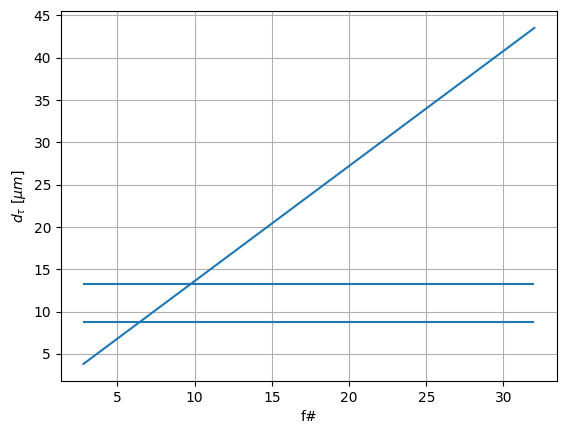

In [6]:
# Particle image diameter range
fStop_range = np.linspace(fStop_min, fStop_max, 1001)
Particle_image_diameter_range = piv_f.particle_image_diameter(Particle_mean_diameter, Magnification_factor, Wavelength,
                                                              fStop_range)

plt.plot(fStop_range, Particle_image_diameter_range)
plt.hlines(Pixel_pitch * 2, fStop_min, fStop_max)
plt.hlines(Pixel_pitch * 3, fStop_min, fStop_max)
plt.xlabel("f#")
plt.ylabel(r"$d_{\tau}$ [$\mu m$]")
plt.grid()
plt.show()